In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글폰트 지정
plt.rcParams['axes.unicode_minus']=False # 한글폰트 사용 시 -기호 깨지는 문제 해결

In [5]:
loc_weather_df = pd.read_pickle('C:\\Users\\acorn\\Desktop/weather_pivot.pkl')
loc_weather_df

,날짜,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,동두천_최고기온,밀양_최고기온,...,광주_평균기온,대전_평균기온,동두천_평균기온,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도
0,2014-01-01,0.0,0.0,0.0,0.0,0.0,10.6,9.7,7.1,11.0,...,5.2,5.1,2.7,3.2,4.1,54.5,61.1,62.6,48.9,41.5
1,2014-01-02,0.0,0.0,0.0,0.0,0.0,10.3,9.1,6.5,11.8,...,4.3,2.6,0.4,1.9,-1.3,51.1,56.5,42.3,48.5,58.9
2,2014-01-03,0.0,0.0,0.0,0.0,0.0,11.8,9.6,5.8,11.5,...,4.5,2.1,0.1,0.9,-0.7,47.3,59.5,70.9,54.0,68.8
3,2014-01-04,0.0,0.0,0.0,0.0,0.0,6.7,6.5,4.6,11.5,...,2.4,1.0,-1.1,3.3,-0.2,55.4,61.4,55.4,55.9,77.8
4,2014-01-05,0.0,0.0,0.0,0.0,0.0,7.6,5.5,4.0,10.9,...,1.2,-0.8,-2.0,3.0,-0.6,54.4,68.9,55.6,55.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,2024-10-23,0.1,1.2,0.8,0.2,3.6,18.5,18.6,16.3,21.4,...,15.0,13.7,11.4,16.9,11.9,70.9,72.3,86.4,58.0,77.1
3949,2024-10-24,0.0,0.0,0.0,0.0,0.0,20.5,19.2,17.9,21.8,...,14.1,12.0,10.1,13.5,10.6,63.5,76.0,85.6,66.1,80.6
3950,2024-10-25,0.0,0.0,0.0,0.0,0.0,20.6,22.2,22.3,23.6,...,15.1,14.5,12.5,16.0,12.1,74.9,78.0,80.3,72.6,81.6
3951,2024-10-26,0.0,0.0,0.0,0.0,0.0,24.6,24.2,24.2,24.0,...,17.7,17.2,14.9,16.5,15.3,74.8,74.4,80.8,73.0,79.9


In [7]:
loc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          3953 non-null   datetime64[ns]
 1   광주_강수량      3953 non-null   float64       
 2   대전_강수량      3953 non-null   float64       
 3   동두천_강수량     3953 non-null   float64       
 4   밀양_강수량      3953 non-null   float64       
 5   인제_강수량      3953 non-null   float64       
 6   광주_최고기온     3953 non-null   float64       
 7   대전_최고기온     3953 non-null   float64       
 8   동두천_최고기온    3953 non-null   float64       
 9   밀양_최고기온     3953 non-null   float64       
 10  인제_최고기온     3953 non-null   float64       
 11  광주_최대풍속     3953 non-null   float64       
 12  대전_최대풍속     3953 non-null   float64       
 13  동두천_최대풍속    3953 non-null   float64       
 14  밀양_최대풍속     3953 non-null   float64       
 15  인제_최대풍속     3953 non-null   float64       
 16  광주_최저기온     3953 non-nul

In [9]:
df_출하량 = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\출하량_가락\\품목_출하량_전부.csv', encoding = 'cp949')

# df_출하량
# 컬럼명 수정
df_출하량 = df_출하량.rename(columns={'DATE':'날짜', '총반입량':'가락시장반입량'})
# 날짜 datetime형 변환
df_출하량['날짜'] = pd.to_datetime(df_출하량['날짜'].astype(str), format='%Y-%m-%d')
# 컬럼 선택
df_반입량 = df_출하량[['날짜', '품목명', '가락시장반입량']]

df_반입량


,날짜,품목명,가락시장반입량
0,2024-11-09,감자,201
1,2024-11-08,감자,244
2,2024-11-07,감자,247
3,2024-11-06,감자,208
4,2024-11-05,감자,199
...,...,...,...
38358,2014-01-08,오이,161
38359,2014-01-07,오이,138
38360,2014-01-06,오이,273
38361,2014-01-04,오이,143


In [13]:
df_가격 = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\일별소매가\\품목_소매가_전부.csv', encoding = 'cp949')

# df_가격
# 컬럼명 수정
df_가격 = df_가격.rename(columns={'구분':'날짜', '전통시장':'전통시장가격', '유통업체':'유통업체가격', '평균':'평균가격', '품목':'품목명'})
# 날짜 datetime 형변환
df_가격['날짜'] = pd.to_datetime(df_가격['날짜'])
# 가격 숫자형 변환
columns_to_convert = ['전통시장가격', '유통업체가격', '평균가격']
df_가격[columns_to_convert] = df_가격[columns_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

df_가격 = df_가격[['날짜', '평균가격', '품목명']]
df_가격

,날짜,평균가격,품목명
0,2014-01-02,202.0,감자
1,2014-01-03,208.0,감자
2,2014-01-04,208.0,감자
3,2014-01-05,208.0,감자
4,2014-01-06,281.0,감자
...,...,...,...
65115,2024-12-01,529.0,팽이
65116,2024-12-02,529.0,팽이
65117,2024-12-03,530.0,팽이
65118,2024-12-04,534.0,팽이


In [8]:
df_반입량.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38363 entries, 0 to 38362
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       38363 non-null  datetime64[ns]
 1   가락시장반입량  38363 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 599.6 KB


In [14]:
df_weather_qty = pd.merge(df_반입량, loc_weather_df, on='날짜', how='left')
df_weather_qty

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,광주_평균기온,대전_평균기온,동두천_평균기온,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도
0,2024-11-09,감자,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-08,감자,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-11-07,감자,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-11-06,감자,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-11-05,감자,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38358,2014-01-08,오이,161,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,2.9,1.2,-0.2,3.2,1.8,65.8,69.6,63.5,67.8,57.1
38359,2014-01-07,오이,138,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,3.8,0.7,1.6,1.8,0.1,54.1,72.0,71.9,52.3,71.5
38360,2014-01-06,오이,273,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,2.3,-0.2,-1.2,0.8,-3.4,51.9,66.9,64.1,48.8,74.8
38361,2014-01-04,오이,143,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,2.4,1.0,-1.1,3.3,-0.2,55.4,61.4,55.4,55.9,77.8


In [28]:
df_wth_qty = df_weather_qty.dropna()
df_wth_qty

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,광주_평균기온,대전_평균기온,동두천_평균기온,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도
12,2024-10-26,감자,200,0.0,0.0,0.0,0.0,0.0,24.6,24.2,...,17.7,17.2,14.9,16.5,15.3,74.8,74.4,80.8,73.0,79.9
13,2024-10-25,감자,171,0.0,0.0,0.0,0.0,0.0,20.6,22.2,...,15.1,14.5,12.5,16.0,12.1,74.9,78.0,80.3,72.6,81.6
14,2024-10-24,감자,191,0.0,0.0,0.0,0.0,0.0,20.5,19.2,...,14.1,12.0,10.1,13.5,10.6,63.5,76.0,85.6,66.1,80.6
15,2024-10-23,감자,248,0.1,1.2,0.8,0.2,3.6,18.5,18.6,...,15.0,13.7,11.4,16.9,11.9,70.9,72.3,86.4,58.0,77.1
16,2024-10-22,감자,226,33.3,13.1,20.7,60.1,42.9,21.0,18.6,...,18.3,16.6,13.9,18.6,13.6,94.6,97.4,99.4,91.5,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38358,2014-01-08,오이,161,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,2.9,1.2,-0.2,3.2,1.8,65.8,69.6,63.5,67.8,57.1
38359,2014-01-07,오이,138,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,3.8,0.7,1.6,1.8,0.1,54.1,72.0,71.9,52.3,71.5
38360,2014-01-06,오이,273,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,2.3,-0.2,-1.2,0.8,-3.4,51.9,66.9,64.1,48.8,74.8
38361,2014-01-04,오이,143,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,2.4,1.0,-1.1,3.3,-0.2,55.4,61.4,55.4,55.9,77.8


In [29]:
df_wth_qty_배추 = df_wth_qty[df_wth_qty['품목명'] == '배추']
df_wth_qty_배추

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,광주_평균기온,대전_평균기온,동두천_평균기온,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도
20012,2024-10-26,배추,563,0.0,0.0,0.0,0.0,0.0,24.6,24.2,...,17.7,17.2,14.9,16.5,15.3,74.8,74.4,80.8,73.0,79.9
20013,2024-10-25,배추,693,0.0,0.0,0.0,0.0,0.0,20.6,22.2,...,15.1,14.5,12.5,16.0,12.1,74.9,78.0,80.3,72.6,81.6
20014,2024-10-24,배추,516,0.0,0.0,0.0,0.0,0.0,20.5,19.2,...,14.1,12.0,10.1,13.5,10.6,63.5,76.0,85.6,66.1,80.6
20015,2024-10-23,배추,395,0.1,1.2,0.8,0.2,3.6,18.5,18.6,...,15.0,13.7,11.4,16.9,11.9,70.9,72.3,86.4,58.0,77.1
20016,2024-10-22,배추,568,33.3,13.1,20.7,60.1,42.9,21.0,18.6,...,18.3,16.6,13.9,18.6,13.6,94.6,97.4,99.4,91.5,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23306,2014-01-08,배추,337,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,2.9,1.2,-0.2,3.2,1.8,65.8,69.6,63.5,67.8,57.1
23307,2014-01-07,배추,446,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,3.8,0.7,1.6,1.8,0.1,54.1,72.0,71.9,52.3,71.5
23308,2014-01-06,배추,546,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,2.3,-0.2,-1.2,0.8,-3.4,51.9,66.9,64.1,48.8,74.8
23309,2014-01-04,배추,387,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,2.4,1.0,-1.1,3.3,-0.2,55.4,61.4,55.4,55.9,77.8


In [30]:
df_wth_qty_배추_drop = df_wth_qty_배추.drop(columns = ['날짜', '품목명'])
df_wth_qty_배추_drop

,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,동두천_최고기온,밀양_최고기온,...,광주_평균기온,대전_평균기온,동두천_평균기온,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도
20012,563,0.0,0.0,0.0,0.0,0.0,24.6,24.2,24.2,24.0,...,17.7,17.2,14.9,16.5,15.3,74.8,74.4,80.8,73.0,79.9
20013,693,0.0,0.0,0.0,0.0,0.0,20.6,22.2,22.3,23.6,...,15.1,14.5,12.5,16.0,12.1,74.9,78.0,80.3,72.6,81.6
20014,516,0.0,0.0,0.0,0.0,0.0,20.5,19.2,17.9,21.8,...,14.1,12.0,10.1,13.5,10.6,63.5,76.0,85.6,66.1,80.6
20015,395,0.1,1.2,0.8,0.2,3.6,18.5,18.6,16.3,21.4,...,15.0,13.7,11.4,16.9,11.9,70.9,72.3,86.4,58.0,77.1
20016,568,33.3,13.1,20.7,60.1,42.9,21.0,18.6,15.3,20.9,...,18.3,16.6,13.9,18.6,13.6,94.6,97.4,99.4,91.5,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23306,337,1.5,0.2,0.3,3.5,0.0,6.0,5.3,4.0,4.9,...,2.9,1.2,-0.2,3.2,1.8,65.8,69.6,63.5,67.8,57.1
23307,446,0.0,0.0,0.0,0.0,0.0,9.6,7.2,5.8,10.6,...,3.8,0.7,1.6,1.8,0.1,54.1,72.0,71.9,52.3,71.5
23308,546,0.0,0.0,0.0,0.0,0.0,8.8,7.3,6.4,10.1,...,2.3,-0.2,-1.2,0.8,-3.4,51.9,66.9,64.1,48.8,74.8
23309,387,0.0,0.0,0.0,0.0,0.0,6.7,6.5,4.6,11.5,...,2.4,1.0,-1.1,3.3,-0.2,55.4,61.4,55.4,55.9,77.8


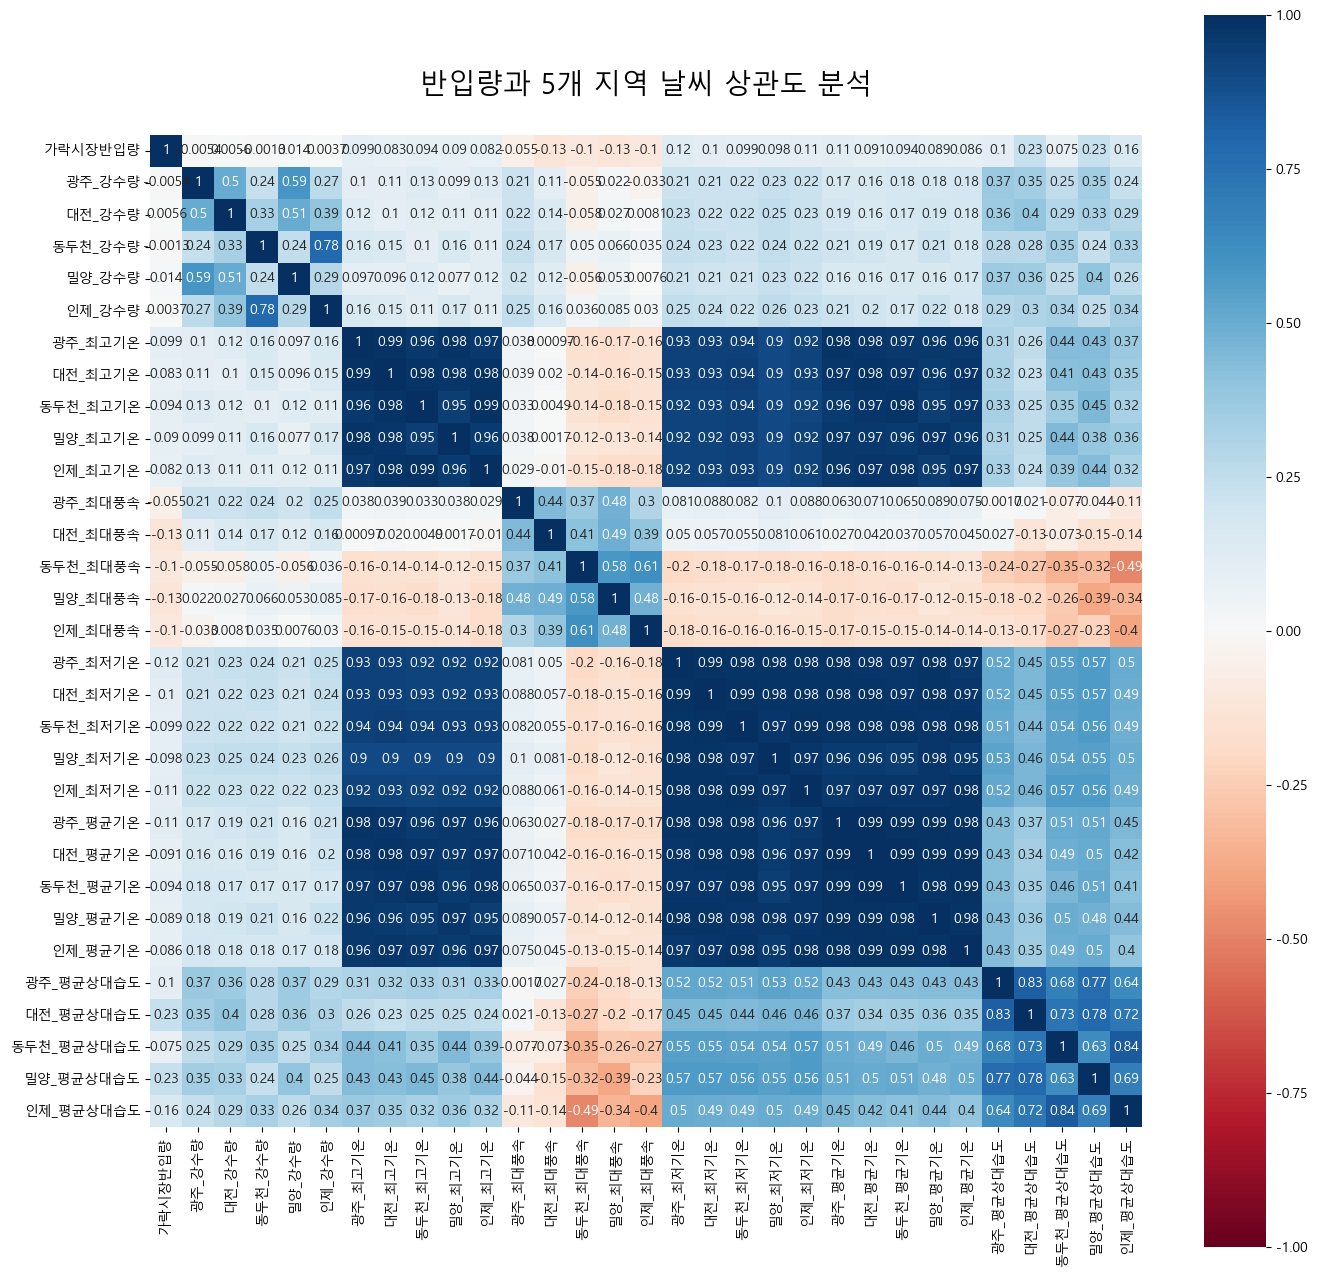

In [25]:
df_wth_qty_배추_corr = df_wth_qty_배추.corr()
# 시본 히트맵 사각형 그리기
# 히트맵 그리기
plt.figure(figsize=(16, 16))
sns.heatmap(
    df_wth_qty_배추_corr, 
    annot=True, 
    cmap='RdBu',  # -1은 파란색, 1은 빨간색
    vmin=-1,      # 컬러맵 최소값
    vmax=1,       # 컬러맵 최대값
    center=0,     # 0을 기준으로 색상 분리
    annot_kws={"size": 10},  # 주석 글자 크기
    square=True   # 정사각형 셀 유지
)
plt.title('반입량과 5개 지역 날씨 상관도 분석', fontsize = 20, pad = 30)
# 그래프 저장 및 출력
# plt.savefig('반입량과 5개 지역 날씨 상관도 분석.png', dpi=200)
plt.show()

In [31]:
df_wth_qty_배추

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,광주_평균기온,대전_평균기온,동두천_평균기온,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도
20012,2024-10-26,배추,563,0.0,0.0,0.0,0.0,0.0,24.6,24.2,...,17.7,17.2,14.9,16.5,15.3,74.8,74.4,80.8,73.0,79.9
20013,2024-10-25,배추,693,0.0,0.0,0.0,0.0,0.0,20.6,22.2,...,15.1,14.5,12.5,16.0,12.1,74.9,78.0,80.3,72.6,81.6
20014,2024-10-24,배추,516,0.0,0.0,0.0,0.0,0.0,20.5,19.2,...,14.1,12.0,10.1,13.5,10.6,63.5,76.0,85.6,66.1,80.6
20015,2024-10-23,배추,395,0.1,1.2,0.8,0.2,3.6,18.5,18.6,...,15.0,13.7,11.4,16.9,11.9,70.9,72.3,86.4,58.0,77.1
20016,2024-10-22,배추,568,33.3,13.1,20.7,60.1,42.9,21.0,18.6,...,18.3,16.6,13.9,18.6,13.6,94.6,97.4,99.4,91.5,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23306,2014-01-08,배추,337,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,2.9,1.2,-0.2,3.2,1.8,65.8,69.6,63.5,67.8,57.1
23307,2014-01-07,배추,446,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,3.8,0.7,1.6,1.8,0.1,54.1,72.0,71.9,52.3,71.5
23308,2014-01-06,배추,546,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,2.3,-0.2,-1.2,0.8,-3.4,51.9,66.9,64.1,48.8,74.8
23309,2014-01-04,배추,387,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,2.4,1.0,-1.1,3.3,-0.2,55.4,61.4,55.4,55.9,77.8


In [ ]:
df_wth_qty[df_wth_qty['품목명'] == '배추']

In [46]:
# 그래프 그릴 때 사용할 컬럼 생성
df_wth_qty['년월'] = df_wth_qty['날짜'].dt.strftime('%Y-%m')
df_wth_qty['년'] = df_wth_qty['날짜'].dt.year
df_wth_qty['월'] = df_wth_qty['날짜'].dt.month
df_wth_qty

C:\Users\acorn\AppData\Local\Temp\ipykernel_5672\2786336504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wth_qty['년월'] = df_wth_qty['날짜'].dt.strftime('%Y-%m')
C:\Users\acorn\AppData\Local\Temp\ipykernel_5672\2786336504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wth_qty['년'] = df_wth_qty['날짜'].dt.year
C:\Users\acorn\AppData\Local\Temp\ipykernel_5672\2786336504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도,년월,년,월
12,2024-10-26,감자,200,0.0,0.0,0.0,0.0,0.0,24.6,24.2,...,16.5,15.3,74.8,74.4,80.8,73.0,79.9,2024-10,2024,10
13,2024-10-25,감자,171,0.0,0.0,0.0,0.0,0.0,20.6,22.2,...,16.0,12.1,74.9,78.0,80.3,72.6,81.6,2024-10,2024,10
14,2024-10-24,감자,191,0.0,0.0,0.0,0.0,0.0,20.5,19.2,...,13.5,10.6,63.5,76.0,85.6,66.1,80.6,2024-10,2024,10
15,2024-10-23,감자,248,0.1,1.2,0.8,0.2,3.6,18.5,18.6,...,16.9,11.9,70.9,72.3,86.4,58.0,77.1,2024-10,2024,10
16,2024-10-22,감자,226,33.3,13.1,20.7,60.1,42.9,21.0,18.6,...,18.6,13.6,94.6,97.4,99.4,91.5,96.5,2024-10,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38358,2014-01-08,오이,161,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,3.2,1.8,65.8,69.6,63.5,67.8,57.1,2014-01,2014,1
38359,2014-01-07,오이,138,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,1.8,0.1,54.1,72.0,71.9,52.3,71.5,2014-01,2014,1
38360,2014-01-06,오이,273,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,0.8,-3.4,51.9,66.9,64.1,48.8,74.8,2014-01,2014,1
38361,2014-01-04,오이,143,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,3.3,-0.2,55.4,61.4,55.4,55.9,77.8,2014-01,2014,1


In [49]:
df_wth_qty[df_wth_qty['품목명'] == '배추']

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도,년월,년,월
20012,2024-10-26,배추,563,0.0,0.0,0.0,0.0,0.0,24.6,24.2,...,16.5,15.3,74.8,74.4,80.8,73.0,79.9,2024-10,2024,10
20013,2024-10-25,배추,693,0.0,0.0,0.0,0.0,0.0,20.6,22.2,...,16.0,12.1,74.9,78.0,80.3,72.6,81.6,2024-10,2024,10
20014,2024-10-24,배추,516,0.0,0.0,0.0,0.0,0.0,20.5,19.2,...,13.5,10.6,63.5,76.0,85.6,66.1,80.6,2024-10,2024,10
20015,2024-10-23,배추,395,0.1,1.2,0.8,0.2,3.6,18.5,18.6,...,16.9,11.9,70.9,72.3,86.4,58.0,77.1,2024-10,2024,10
20016,2024-10-22,배추,568,33.3,13.1,20.7,60.1,42.9,21.0,18.6,...,18.6,13.6,94.6,97.4,99.4,91.5,96.5,2024-10,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23306,2014-01-08,배추,337,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,3.2,1.8,65.8,69.6,63.5,67.8,57.1,2014-01,2014,1
23307,2014-01-07,배추,446,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,1.8,0.1,54.1,72.0,71.9,52.3,71.5,2014-01,2014,1
23308,2014-01-06,배추,546,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,0.8,-3.4,51.9,66.9,64.1,48.8,74.8,2014-01,2014,1
23309,2014-01-04,배추,387,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,3.3,-0.2,55.4,61.4,55.4,55.9,77.8,2014-01,2014,1


In [50]:
df_wth_qty[df_wth_qty['년'] == 2023]

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도,년월,년,월
261,2023-12-30,감자,161,0.5,1.9,11.0,0.9,6.8,8.0,3.3,...,3.5,-1.3,90.3,89.3,93.0,69.1,94.0,2023-12,2023,12
262,2023-12-29,감자,236,0.0,0.0,0.0,0.0,0.0,8.7,7.7,...,2.3,-2.4,84.3,74.6,75.5,63.5,80.6,2023-12,2023,12
263,2023-12-28,감자,275,0.0,0.0,0.0,0.0,0.0,9.4,6.8,...,2.7,-1.7,87.4,78.3,76.0,62.6,76.8,2023-12,2023,12
264,2023-12-27,감자,273,0.0,0.0,0.0,0.0,0.0,10.8,9.6,...,3.4,-3.2,85.5,73.6,74.4,59.9,83.9,2023-12,2023,12
265,2023-12-26,감자,386,0.0,0.0,0.0,0.0,0.0,8.7,8.2,...,0.3,-0.3,83.3,72.3,78.3,65.5,74.0,2023-12,2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35613,2023-01-07,오이,142,0.0,0.7,0.3,0.2,4.6,7.3,6.9,...,2.0,-1.2,54.8,62.1,90.0,61.8,89.4,2023-01,2023,1
35614,2023-01-06,오이,150,2.4,2.1,5.3,0.1,0.0,8.4,7.7,...,0.6,-3.8,81.4,72.4,74.1,61.0,70.3,2023-01,2023,1
35615,2023-01-05,오이,134,0.0,0.0,0.0,0.0,0.0,8.0,5.6,...,-0.5,-6.0,75.3,66.1,59.8,59.9,62.4,2023-01,2023,1
35616,2023-01-04,오이,158,0.0,0.0,0.0,0.0,0.0,5.4,5.5,...,0.8,-7.6,62.4,53.3,55.0,39.9,61.3,2023-01,2023,1


In [52]:
df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도,년월,년,월
20261,2023-12-30,배추,390,0.5,1.9,11.0,0.9,6.8,8.0,3.3,...,3.5,-1.3,90.3,89.3,93.0,69.1,94.0,2023-12,2023,12
20262,2023-12-29,배추,301,0.0,0.0,0.0,0.0,0.0,8.7,7.7,...,2.3,-2.4,84.3,74.6,75.5,63.5,80.6,2023-12,2023,12
20263,2023-12-28,배추,435,0.0,0.0,0.0,0.0,0.0,9.4,6.8,...,2.7,-1.7,87.4,78.3,76.0,62.6,76.8,2023-12,2023,12
20264,2023-12-27,배추,266,0.0,0.0,0.0,0.0,0.0,10.8,9.6,...,3.4,-3.2,85.5,73.6,74.4,59.9,83.9,2023-12,2023,12
20265,2023-12-26,배추,269,0.0,0.0,0.0,0.0,0.0,8.7,8.2,...,0.3,-0.3,83.3,72.3,78.3,65.5,74.0,2023-12,2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20561,2023-01-07,배추,202,0.0,0.7,0.3,0.2,4.6,7.3,6.9,...,2.0,-1.2,54.8,62.1,90.0,61.8,89.4,2023-01,2023,1
20562,2023-01-06,배추,304,2.4,2.1,5.3,0.1,0.0,8.4,7.7,...,0.6,-3.8,81.4,72.4,74.1,61.0,70.3,2023-01,2023,1
20563,2023-01-05,배추,281,0.0,0.0,0.0,0.0,0.0,8.0,5.6,...,-0.5,-6.0,75.3,66.1,59.8,59.9,62.4,2023-01,2023,1
20564,2023-01-04,배추,272,0.0,0.0,0.0,0.0,0.0,5.4,5.5,...,0.8,-7.6,62.4,53.3,55.0,39.9,61.3,2023-01,2023,1


<Figure size 1200x800 with 0 Axes>

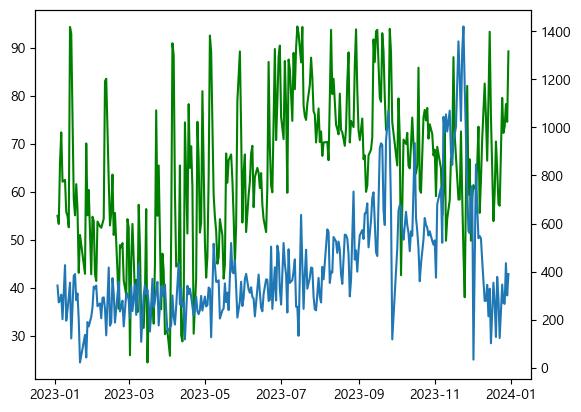

In [55]:
# 반입량과 대전_평균상대습도 상관도 최대값 0.23

plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()
x = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['대전_평균상대습도']
ax1.plot(x, y, color='green')

ax2 = ax1.twinx()
x = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['가락시장반입량']
ax2.plot(x, y, )

plt.show()

<Figure size 1200x800 with 0 Axes>

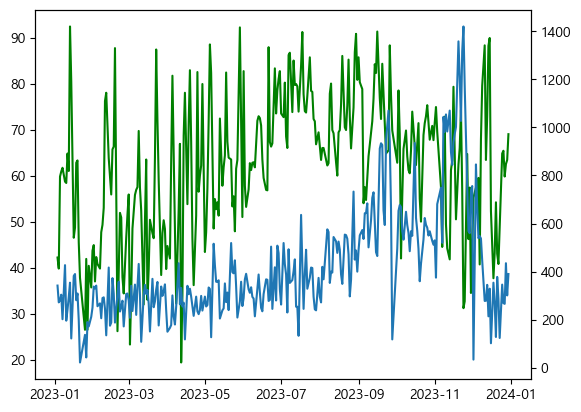

In [56]:
# 반입량과 밀양_평균상대습도 상관도 최대값 0.23

plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()
x = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['밀양_평균상대습도']
ax1.plot(x, y, color='green')

ax2 = ax1.twinx()
x = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['가락시장반입량']
ax2.plot(x, y, )

plt.show()

<Figure size 1200x800 with 0 Axes>

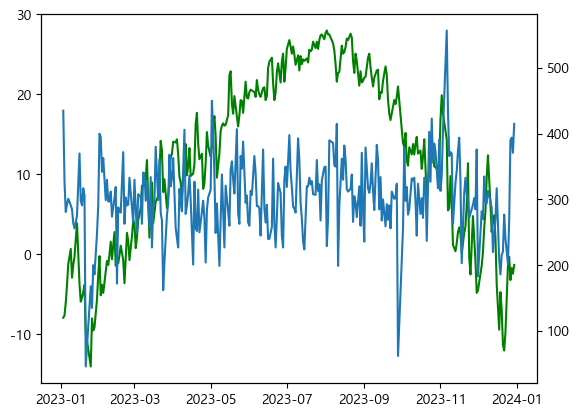

In [63]:
# 반입량과 밀양_평균상대습도 상관도 최대값 0.23

plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()
x = df_wth_qty[(df_wth_qty['품목명'] == '양배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '양배추') & (df_wth_qty['년'] == 2023)]['인제_평균기온']
ax1.plot(x, y, color='green')

ax2 = ax1.twinx()
x = df_wth_qty[(df_wth_qty['품목명'] == '양배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '양배추') & (df_wth_qty['년'] == 2023)]['가락시장반입량']
ax2.plot(x, y, )

plt.show()

In [ ]:
# 반입량과 밀양_평균상대습도 상관도 최대값 0.23

plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()
x = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['밀양_평균기온']
ax1.plot(x, y, color='green')

ax2 = ax1.twinx()
x = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['날짜']
y = df_wth_qty[(df_wth_qty['품목명'] == '배추') & (df_wth_qty['년'] == 2023)]['가락시장반입량']
ax2.plot(x, y, )

plt.show()

In [44]:
df = df_wth_qty_배추
df

,날짜,품목명,가락시장반입량,광주_강수량,대전_강수량,동두천_강수량,밀양_강수량,인제_강수량,광주_최고기온,대전_최고기온,...,밀양_평균기온,인제_평균기온,광주_평균상대습도,대전_평균상대습도,동두천_평균상대습도,밀양_평균상대습도,인제_평균상대습도,년월,년,월
20012,2024-10-26,배추,563,0.0,0.0,0.0,0.0,0.0,24.6,24.2,...,16.5,15.3,74.8,74.4,80.8,73.0,79.9,2024-10,2024,10
20013,2024-10-25,배추,693,0.0,0.0,0.0,0.0,0.0,20.6,22.2,...,16.0,12.1,74.9,78.0,80.3,72.6,81.6,2024-10,2024,10
20014,2024-10-24,배추,516,0.0,0.0,0.0,0.0,0.0,20.5,19.2,...,13.5,10.6,63.5,76.0,85.6,66.1,80.6,2024-10,2024,10
20015,2024-10-23,배추,395,0.1,1.2,0.8,0.2,3.6,18.5,18.6,...,16.9,11.9,70.9,72.3,86.4,58.0,77.1,2024-10,2024,10
20016,2024-10-22,배추,568,33.3,13.1,20.7,60.1,42.9,21.0,18.6,...,18.6,13.6,94.6,97.4,99.4,91.5,96.5,2024-10,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23306,2014-01-08,배추,337,1.5,0.2,0.3,3.5,0.0,6.0,5.3,...,3.2,1.8,65.8,69.6,63.5,67.8,57.1,2014-01,2014,1
23307,2014-01-07,배추,446,0.0,0.0,0.0,0.0,0.0,9.6,7.2,...,1.8,0.1,54.1,72.0,71.9,52.3,71.5,2014-01,2014,1
23308,2014-01-06,배추,546,0.0,0.0,0.0,0.0,0.0,8.8,7.3,...,0.8,-3.4,51.9,66.9,64.1,48.8,74.8,2014-01,2014,1
23309,2014-01-04,배추,387,0.0,0.0,0.0,0.0,0.0,6.7,6.5,...,3.3,-0.2,55.4,61.4,55.4,55.9,77.8,2014-01,2014,1
